## **Importing Necessary Libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import plotly.express as px

## **Reading All The Excel Files**

In [2]:
gender = pd.read_excel ('2021_EntriesGender.xlsx')
teams = pd.read_excel ('2021_Teams.xlsx')
athletes = pd.read_excel('2021_Athletes.xlsx')
coaches = pd.read_excel('2021_Coaches.xlsx')
medals = pd.read_excel('2021_Medals.xlsx')

C:\Users\hp\Documents\Python\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\hp\Documents\Python\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## **Sorting all the countries on basis of Total Medals Won**

In [3]:
medals.head(10).sort_values(by="Rank by Total", ascending=True).style.set_properties(**
{'background-color': '#F0F0F0','color': '#222222','border': '1.5px  solid black'}).bar(
color='#FFD700',vmin = 100_000,subset=['Gold']).bar(
color='#C0C0C0',vmin = 100_000,subset=['Silver']).bar(
color='#CD7F32',vmin=100_000,subset =['Bronze'])

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


## **Country Wise Medal Distribution**

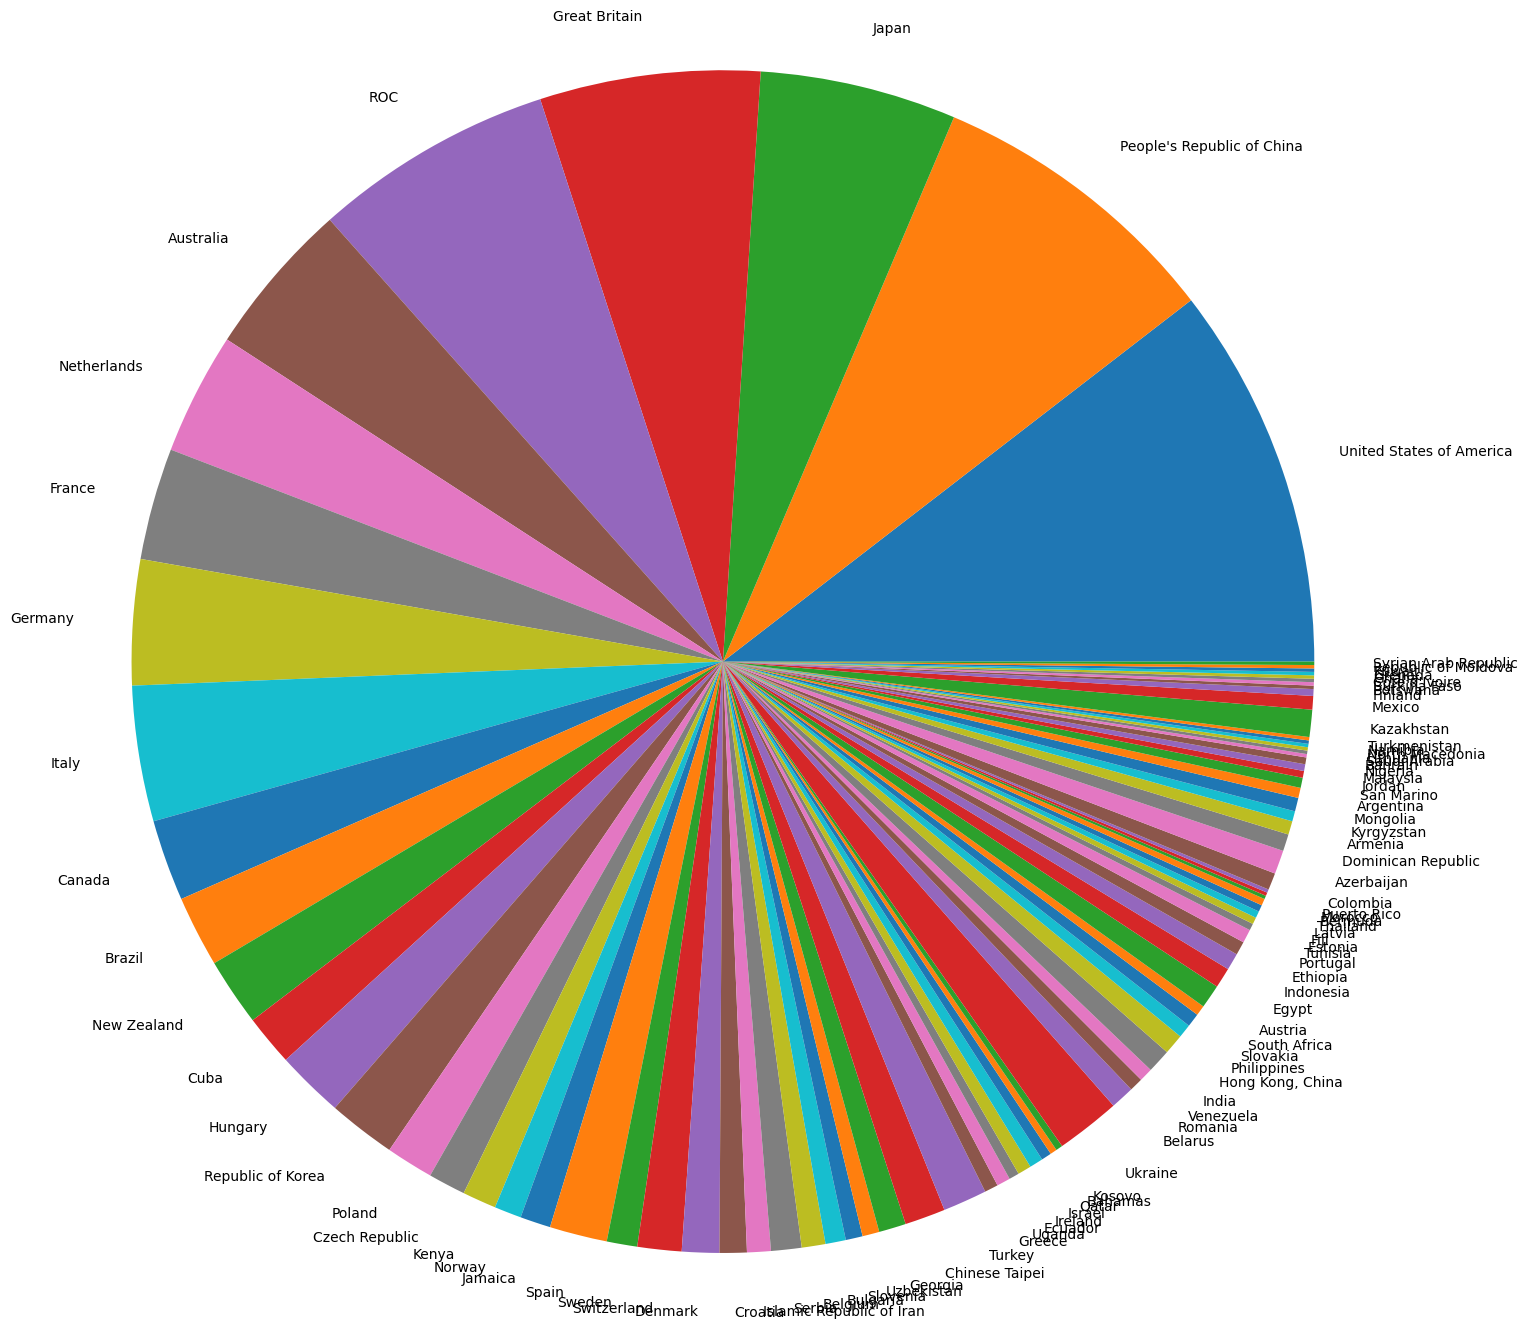

In [19]:
plt.pie(medals['Total'],labels = medals['Team/NOC'], autopct=None, radius = 4)
plt.show()

## **Top 10 Country by Number of Athletes**

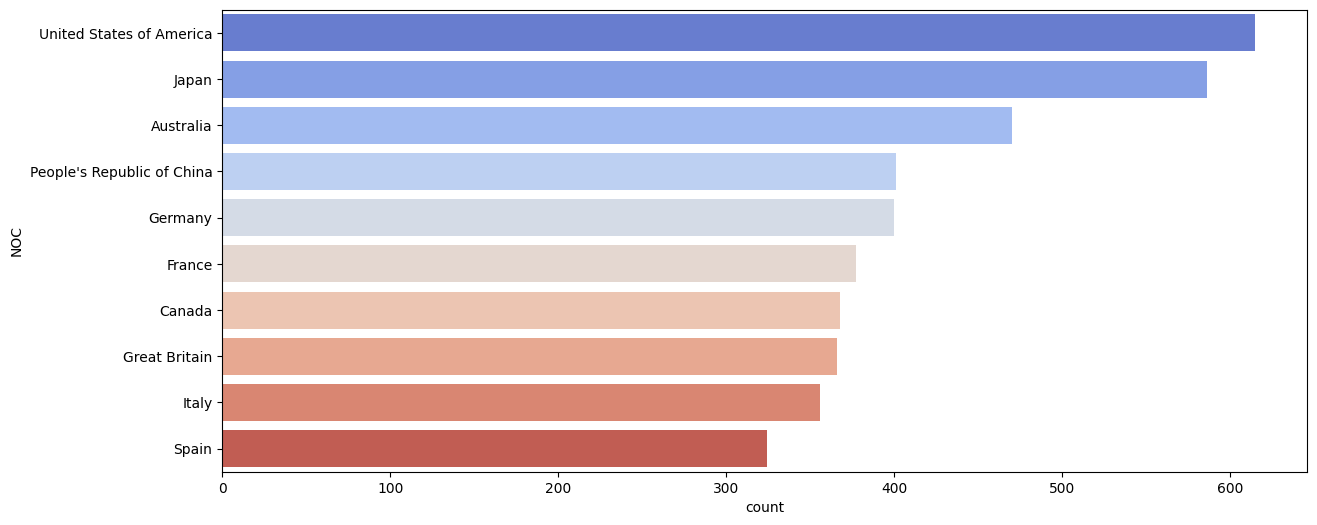

In [13]:
plt.figure(figsize=(14, 6))
top10_athlete = athletes.groupby('NOC')['Discipline'].describe()
top10_athlete.sort_values(by='count', ascending=False, inplace=True)
#display(top10_athlete[:10])

sns.barplot(x='count', y=top10_athlete.index[:10], data=top10_athlete[:10], palette='coolwarm')
plt.show()

## **Top 10 Country by Number of Discipline**

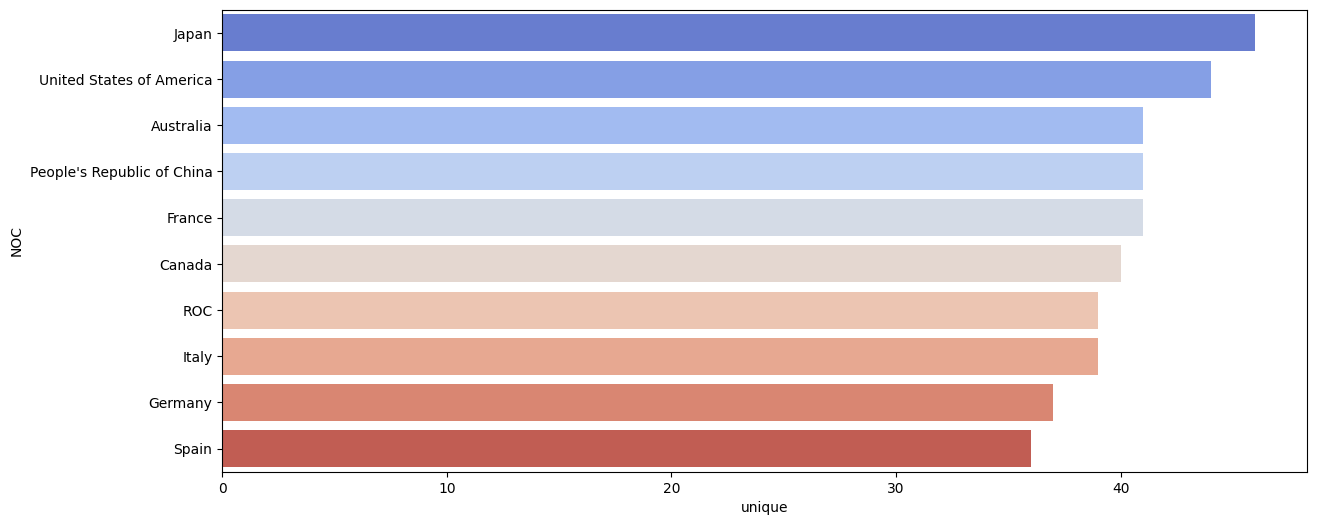

In [14]:
plt.figure(figsize=(14, 6))
top10_discpl_country = athletes.groupby('NOC')['Discipline'].describe()
top10_discpl_country.sort_values(by='unique', ascending=False, inplace=True)
#display(top10_discpl_country[:10])

sns.barplot(x='unique', y=top10_discpl_country.index[:10], data=top10_discpl_country[:10], palette='coolwarm')
plt.show()

## **Top 10 teams and their Medal Plots**

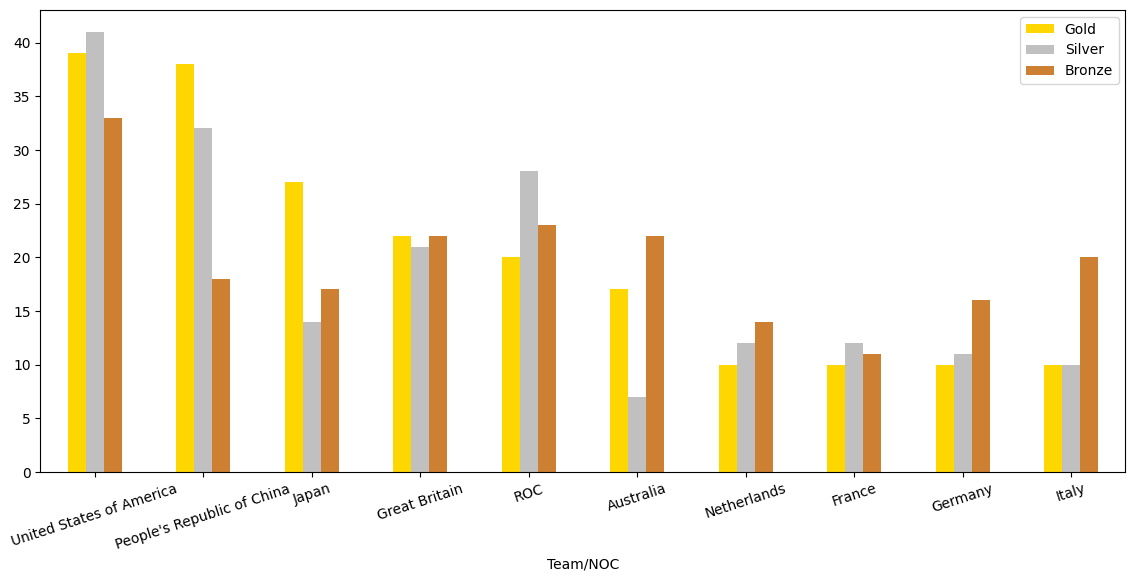

In [15]:
medals[:10].plot(x='Team/NOC', y=['Gold', 'Silver', 'Bronze'], kind='bar', figsize=(14, 6), color=['#FFD700', '#C0C0C0', '#cd7f32'], rot=18)
plt.show()

## **Top 10 teams and their Medal Plots**

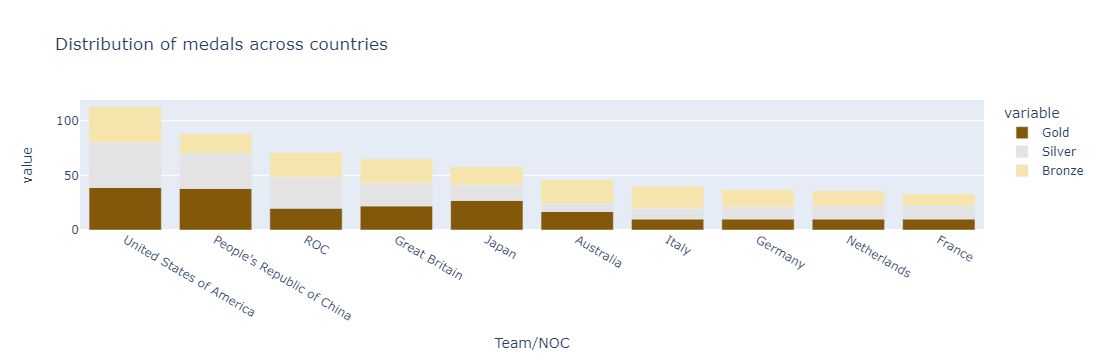

In [28]:
plot_medals = medals.sort_values(by='Total', ascending= False).reset_index(drop=True).head(10)

px.bar(plot_medals, x ='Team/NOC',
        y=['Gold','Silver','Bronze'],
        color_discrete_sequence =['#83580b', '#e3e3e3', '#f6e4ad'],
        title = "Distribution of medals across countries")

## **Map: Glide over any country to see their Total Trophies**

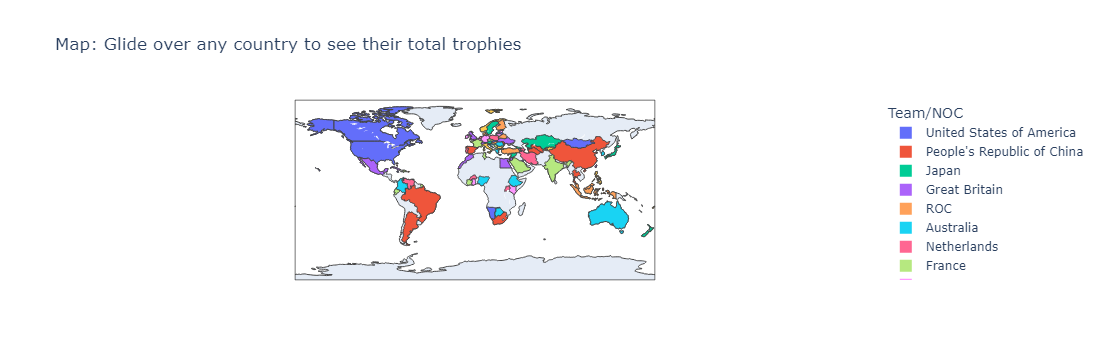

<Figure size 10000x7000 with 0 Axes>

In [26]:
plt.figure(figsize=(100,70))
px.choropleth(medals, locations="Team/NOC", 
                    locationmode='country names', color="Team/NOC", 
                    hover_name="Total", range_color=[1,100], 
                    color_continuous_scale="blues", 
                    title='Map: Glide over any country to see their total trophies')
